# Data Preparation

## Install & Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('stopwords')
from textacy.preprocessing.replace import urls, hashtags, numbers, emails, emojis, currency_symbols, user_handles
from textacy.preprocessing.normalize import quotation_marks, bullet_points
from textacy.preprocessing.remove import punctuation
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

## Import Data

In [13]:
fake_df = pd.read_csv('Datasets/Fake.csv')
true_df = pd.read_csv('Datasets/True.csv')

# set Fake news to target 1
fake_df['target'] = 1
true_df['target'] = 0

# concate two datasets
df = pd.concat([fake_df,true_df], ignore_index = True)

In [14]:
df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


## Exploratory Data Analysis

In [118]:
# number of news
print('Number of fake news:', fake_df.shape)
print('Number of true news:', true_df.shape)
print('Total number of news:', df.shape)

Number of fake news: (23481, 5)
Number of true news: (21417, 5)
Total number of news: (44689, 5)


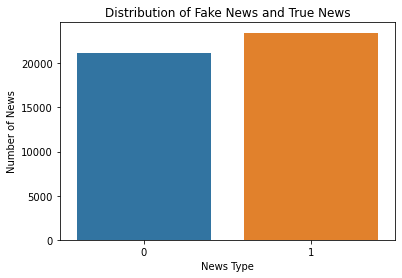

In [122]:
sns.countplot(x = df['target'])
plt.title('Distribution of Fake News and True News')
plt.xlabel('News Type')
plt.ylabel('Number of News')
plt.show()

The dataset is relatively balanced since the number of fake news and true news is similar. There are 44898 news in total and fake and true news account for 23481 and 21417 respectively.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   target   44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [124]:
# breakdown of different subjects
df.subject.value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

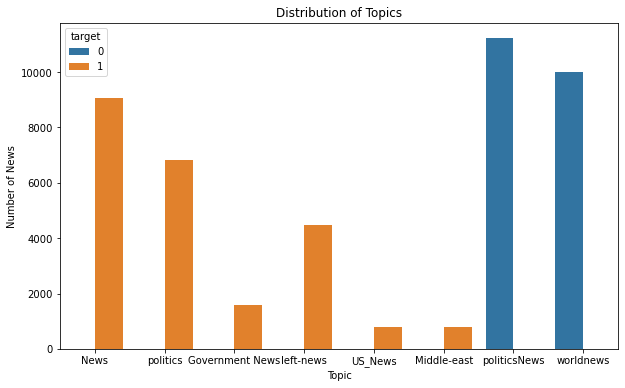

In [125]:
plt.figure(figsize = (10, 6))
sns.countplot(x = df['subject'], hue = df['target'])
plt.title('Distribution of Topics')
plt.xlabel('Topic')
plt.ylabel('Number of News')
plt.show()

### Check null and duplicated value

In [126]:
# check null value
df.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [127]:
# empty news
df.text[df.text.str.strip()==''].count()

631

Although there is no missing value in all columns, 631 rows have empty text in text column.

In [128]:
# check duplicated news
df.duplicated().sum()

0

### Word-related Information

In [17]:
# top 15 common words except for stopwords
stopwords = list(stopwords.words('english'))
punctuations = list(string.punctuation)
for i in punctuations:
  stopwords.append(i)

common_words = Counter(" ".join(df['text']).lower().split()).most_common(100)

remove_list = []
for i in range(len(common_words)):
  for j in range(len(stopwords)):
    if common_words[i][0] == stopwords[j]:
      remove_list.append(common_words[i])

for i in remove_list:
  common_words.remove(i)

common_words = pd.DataFrame(common_words[:15], columns = ['word', 'frequency'])
common_words

,word,frequency
0,trump,101996
1,said,93256
2,would,54622
3,u.s.,46131
4,president,45479
5,people,34759
6,one,33353
7,also,30641
8,new,30519
9,donald,27067


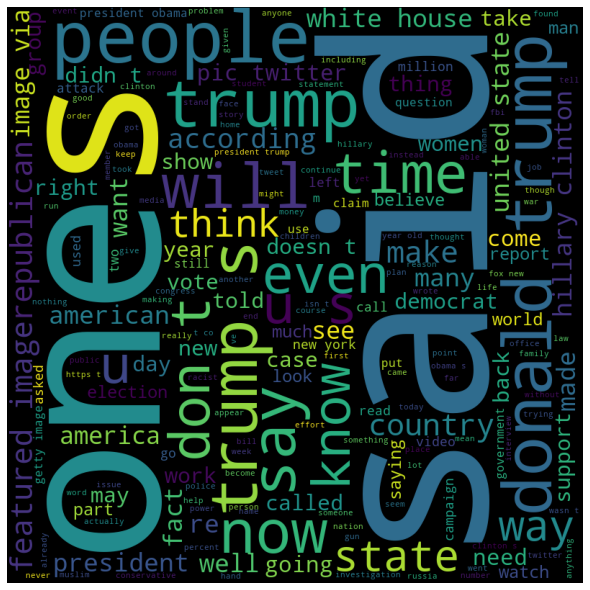

In [134]:
# word cloud for fake news

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df[df['target'] == 1]['text']: 
      
    # typecaste each val to string 
    val = str(val) 
  

    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

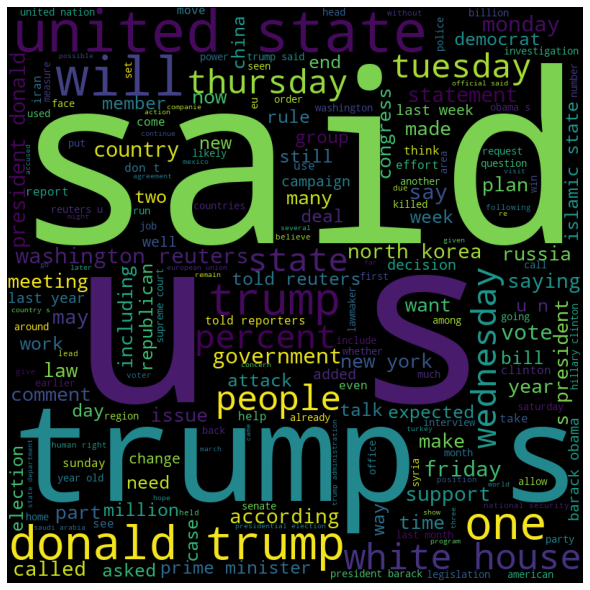

In [135]:
# word cloud for true news

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df[df['target'] == 0]['text']: 
      
    # typecaste each val to string 
    val = str(val) 
  

    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Reference: https://www.geeksforgeeks.org/generating-word-cloud-python/#:~:text=For%20generating%20word%20cloud%20in,from%20UCI%20Machine%20Learning%20Repository.

In [136]:
# average word length
def avg_length(sentence):
  if sentence.strip()!='':
    words = sentence.split()
    average = round(sum(len(word) for word in words)/len(words), 2)
    return average

In [137]:
df['avg_length'] = df['text'].apply(avg_length)

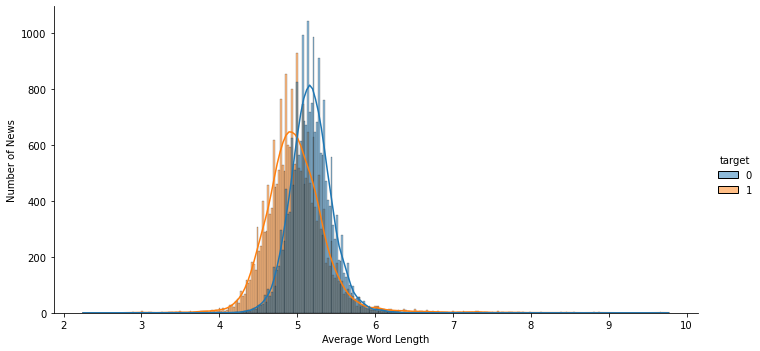

In [138]:
sns.displot(df[df['avg_length'] < 10], x = 'avg_length', hue = 'target', kde = True, height = 5, aspect = 2)
plt.xlabel('Average Word Length')
plt.ylabel('Number of News')
plt.show()

In [139]:
# number of words in text
df['num_word'] = df['text'].apply(lambda x: len(x.split()))

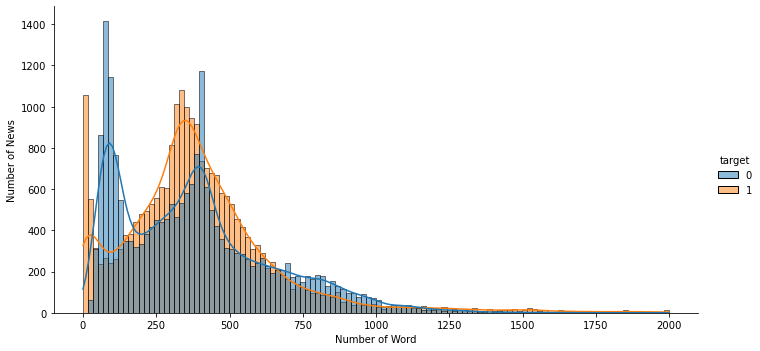

In [140]:
sns.displot(df[df['num_word'] < 2000], x = 'num_word', hue = 'target', kde = True, height = 5, aspect = 2)
plt.xlabel('Number of Word')
plt.ylabel('Number of News')
plt.show()

## Data Preprocessing

### Remove Duplicated News

In [15]:
# remove duplicated news
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

### Reuters

In [16]:
# save reuters as one column
df['reuters'] = df['text'].map(lambda x: re.findall('^(.*?) \(Reuters\) - ', x)[0] if len(re.findall('^(.*?) \(Reuters\) - ', x)) >= 1 else 'UNKNOWN')
# remove reuters details inside (), only keep the reuters name
df['reuters'] = df['reuters'].map(lambda x: re.findall('\(.*\) (?:By|BY)*(.*)', x)[0].lstrip() if len(re.findall('\(.*\) (?:By|BY)*(.*)', x)) >= 1 else x)

In [17]:
# Drop all news without date
check=[]
for i in df['date'].index:
  try:
    new_date = pd.to_datetime(df['date'][i])
  except ValueError:
        check.append(i)
df.drop(check, inplace=True)

In [18]:
# Date Variables
df.reset_index(inplace=True,drop=True)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dow'] = df['date'].dt.dayofweek

In [19]:
# Drop all empty news text 
df.drop(df.text[df.text.str.strip()==''].index,inplace=True)
df.reset_index(inplace=True,drop=True)

### News Text

In [100]:
# save clean text as one column
df['clean_text'] = df['text'].map(lambda x: re.findall('\(Reuters\) - (.*)', x)[0] if len(re.findall('\(Reuters\) - (.*)', x)) >= 1 else x)

In [101]:
# clean urls 
df["clean_text"] = df.clean_text.apply(urls)

In [102]:
# clean photo citations appears in fake news
df["clean_text"] = df.clean_text.str.replace(r'((?:Photo by|Featured image|Via:).+)','',regex=True)

In [112]:
# remove citations with [], eg: [nL2N1N80E2]
df['clean_text'] = df['clean_text'].str.replace('\b(\[.*?\]+)\b','',regex=True)
# update all weekdays into _WEEKDAY_
df['clean_text'] = df['clean_text'].str.replace(r'\b(Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday)s?\b','_WEEKDAY_',regex=True)
# remove all twitter account notation with '(@ )'
# df['clean_text'] = df['clean_text'].str.replace('(\(\@.*?\))','',regex=True)

# find all years and add a space behind it
text = []
for line in df['clean_text']:
  for s in re.findall('(?:20|19)\d{2}[A-Za-z]',line):
    line = line.replace(s, s[:4]+' '+s[-1:])
  text.append(line)
df['clean_text'] = text
# replace all twt dates in format e.g.(December 31, 2017) as _DATE_
df['clean_text'] = df['clean_text'].str.replace('(?:January|February|March|April|May|June|July|August|September|October|November|December) \d{1,2}, 20\d{2}','_DATE_', regex=True)

# deep cleaning in urls
df['clean_text'] = df['clean_text'].str.replace(r'(https:\S+)\s',' URL ', regex= True)


In [154]:
# group country names
df['clean_text'] = df['clean_text'].str.replace(r'\b(U(?:nited)?\s?S(?:tates)?)\b', 'United_States',regex=True)
df['clean_text'] = df['clean_text'].str.replace(r'\b(U(?:nited)?\s?K(?:ingdom)?)\b', 'United_Kingdom',regex=True)

In [116]:
# Use textacy for other preprocessing
df["clean_text"] = df.clean_text.\
  apply(hashtags).\
  apply(numbers).\
  apply(currency_symbols).\
  apply(emojis).\
  apply(emails).\
  apply(quotation_marks).\
  apply(punctuation).\
  apply(bullet_points).\
  apply(user_handles).\
  apply(punctuation)

### News Title

In [129]:
# remove all dates in titles in format e.g. (Dec 31)
df['title'] = df['title'].str.replace('(\((?:January|February|March|April|May|June|July|August|September|October|November|December|(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec).?) \d{1,2}\))', '', regex=True)
# remove all news types in titles e.g. (VIDEO), [TWEET]
reg = r'((?:\(|\[)(?:images?|tweets?|videos?|details?|screenshots|audio|photos?|letter|citations?|documents?|study|poll|infographic|quotes?|cited|podcasts?|listen|watch|vide0)\/?(?:images?|tweets?|videos?|details?|screenshots|audio|photos?|letter|citations?|documents?|study|poll|infographic|quotes?|cited|podcasts?|listen|watch|vide0)?(?:\)|\]))'
df['title'] = df.title.str.replace(reg,'',regex=True,case=False)
# normalize quotation_marks and bulled_points
df['title'] = df['title'].\
    apply(numbers).\
    apply(quotation_marks).\
    apply(bullet_points).\
    apply(punctuation)

### Concate Title with Text

In [157]:
df['summary'] = df['title'] + ' ' + df['clean_text']

In [158]:
# save cleaned data without stopwords removal into csv
df.to_csv('Datasets/cleaned_news_unprocessing.csv',index = False)

In [160]:
# remove stopwords
stop = set(stopwords.words('english'))
summary_list=[]
for text in df['summary']:
  t = []
  for s in text.split():
    if s.strip().lower() not in stop:
      t.append(s.strip())
  summary_list.append(" ".join(t))
df['summary'] = summary_list

# remove all single length word
df['summary'] = df['summary'].str.replace('\b[a-zA-Z]{1}\b','',regex=True)

In [161]:
df.head()

,title,text,subject,date,target,reuters,year,month,day,dow,clean_text,summary
0,Donald Trump Sends Out Embarrassing New Year ...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,UNKNOWN,2017,12,31,6,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Embarrassing New Year Eve M...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,UNKNOWN,2017,12,31,6,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian C...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,UNKNOWN,2017,12,30,5,On WEEKDAY it was revealed that former Milw...,Sheriff David Clarke Becomes Internet Joke Thr...
3,Trump Is So Obsessed He Even Has Obama s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,UNKNOWN,2017,12,29,4,On Christmas day Donald Trump announced that ...,Trump Obsessed Even Obama Name Coded Website C...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,UNKNOWN,2017,12,25,0,Pope Francis used his annual Christmas Day mes...,Pope Francis Called Donald Trump Christmas Spe...


### Lemmatization

In [168]:
# Lemmatize Sentence
# https://gist.github.com/gaurav5430/9fce93759eb2f6b1697883c3782f30de
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [169]:
# lemmatize news summary (title + text)

df['summary'] = [lemmatize_sentence(line) for line in df['summary']]

In [170]:
# lower case all news summary
df['summary'] = df['summary'].str.lower()

In [171]:
df.head()

,title,text,subject,date,target,reuters,year,month,day,dow,clean_text,summary
0,Donald Trump Sends Out Embarrassing New Year ...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,UNKNOWN,2017,12,31,6,Donald Trump just couldn t wish all Americans ...,donald trump sends embarrassing new year eve m...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,UNKNOWN,2017,12,31,6,House Intelligence Committee Chairman Devin Nu...,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,UNKNOWN,2017,12,30,5,On WEEKDAY it was revealed that former Milw...,sheriff david clarke becomes internet joke thr...
3,Trump Is So Obsessed He Even Has Obama s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,UNKNOWN,2017,12,29,4,On Christmas day Donald Trump announced that ...,trump obsessed even obama name coded website c...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,UNKNOWN,2017,12,25,0,Pope Francis used his annual Christmas Day mes...,pope francis called donald trump christmas spe...


### Word Cloud for cleaned data

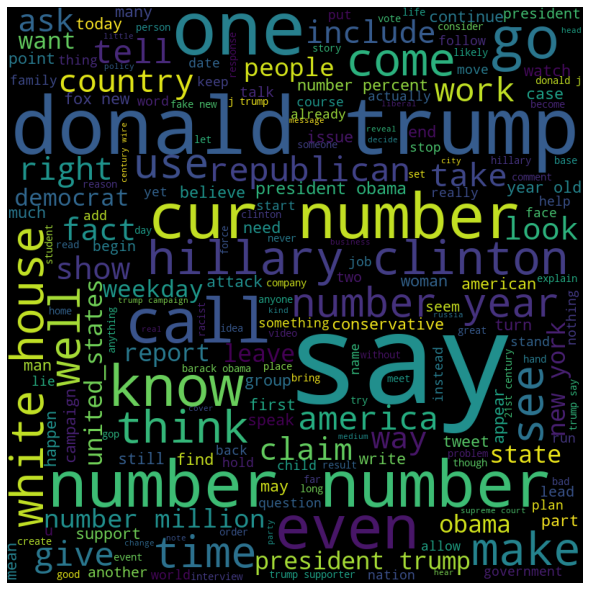

In [178]:
# word cloud for fake news

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df[df['target'] == 1]['summary']: 
      
    # typecaste each val to string 
    val = str(val) 
  

    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

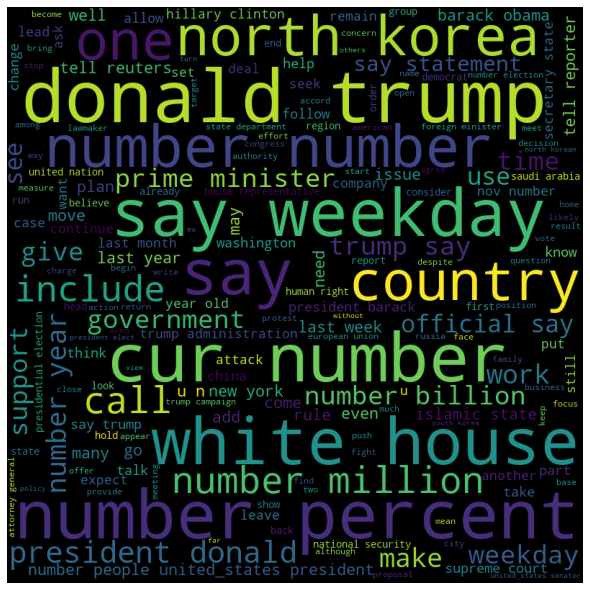

In [179]:
# word cloud for true news

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df[df['target'] == 0]['summary']: 
      
    # typecaste each val to string 
    val = str(val) 
  

    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Save Cleaned Data

In [175]:
df.shape

(44048, 12)

In [176]:
# save cleaned data into csv
df.to_csv('Datasets/cleaned_news_processed.csv',index = False)

## Vectorization

In [3]:
df = pd.read_csv('Datasets/cleaned_news_processed.csv')

In [4]:
# Countvectorizer with unigram
from sklearn.feature_extraction.text import CountVectorizer

cv_uni = CountVectorizer(ngram_range=(1,1), stop_words="english", min_df=5, max_features=5000)
X_cv_uni = cv_uni.fit_transform(df['summary'])
df_cv_uni = pd.DataFrame(X_cv_uni.toarray(), columns=cv_uni.get_feature_names_out())
df_cv_uni = pd.concat([df_cv_uni, df[['reuters','date','year','month','day','dow','target']]],axis=1)

In [5]:
# Countvectorizer with bigram

cv_bi = CountVectorizer(ngram_range=(2,2), stop_words="english", min_df=5, max_features=5000)
X_cv_bi = cv_bi.fit_transform(df['summary'])
df_cv_bi = pd.DataFrame(X_cv_bi.toarray(), columns=cv_bi.get_feature_names_out())
df_cv_bi = pd.concat([df_cv_bi, df[['reuters','date','year','month','day','dow','target']]],axis=1)

In [6]:
# Tfidfvectorizer with unigram
from sklearn.feature_extraction.text import TfidfVectorizer

tv_uni = TfidfVectorizer(ngram_range=(1,1), stop_words="english", min_df=5, max_features=5000)
X_tv_uni = tv_uni.fit_transform(df['summary'])
df_tv_uni = pd.DataFrame(X_tv_uni.toarray(), columns=tv_uni.get_feature_names_out())
df_tv_uni = pd.concat([df_tv_uni, df[['reuters','date','year','month','day','dow','target']]],axis=1)

In [7]:
# Tfidfvectorizer with bigram
tv_bi = TfidfVectorizer(ngram_range=(2,2), stop_words="english", min_df=5, max_features=5000)
X_tv_bi = tv_bi.fit_transform(df['summary'])
df_tv_bi = pd.DataFrame(X_tv_bi.toarray(), columns=tv_bi.get_feature_names_out())
df_tv_bi = pd.concat([df_tv_bi, df[['reuters','date','year','month','day','dow','target']]],axis=1)

In [8]:
# word2vec
import spacy
nlp = spacy.load("en_core_web_md")

X_w2v = np.array([nlp(text).vector for text in df['summary']])
df_w2v = pd.DataFrame(X_w2v)

df_w2v = pd.concat([df_w2v, df[['reuters','date','year','month','day','dow','target']]],axis=1)

In [9]:
df_tv_uni.to_csv('Datasets/vecotrs_tfidf_unigram.csv',index= False)
df_tv_bi.to_csv('Datasets/vecotrs_tfidf_bigram.csv',index= False)
df_w2v.to_csv('Datasets/vectors_word2vec.csv',index= False)

In [ ]:
# save all vecotrized file to csv
df_cv_uni.to_csv('Datasets/vecotrs_count_unigram.csv',index = False)
df_cv_bi.to_csv('Datasets/vecotrs_count_bigram.csv', index= False)
df_tv_uni.to_csv('Datasets/vecotrs_tfidf_unigram.csv',index= False)
df_tv_bi.to_csv('Datasets/vecotrs_tfidf_bigram.csv',index= False)
df_w2v.to_csv('Datasets/vectors_word2vec.csv',index= False)

# Modeling

Data List:
- Unigram Count Vectors: vecotrs_count_unigram.csv
- Bigram Count Vectors: vecotrs_count_bigram.csv
- Unigram TF-IDF Vectors: vecotrs_tfidf_unigram.csv
- Bigram TF-IDF Vectors: vecotrs_tfidf_bigram.csv
- Word2vec vectors: vectors_word2vec.csv

## Import Data

In [5]:
uni_count = pd.read_csv('Datasets/vecotrs_count_unigram.csv')
bi_count = pd.read_csv('Datasets/vecotrs_count_bigram.csv')
uni_tfidf = pd.read_csv('Datasets/vecotrs_tfidf_unigram.csv')
bi_tfidf = pd.read_csv('Datasets/vecotrs_tfidf_bigram.csv')
word2vec =  pd.read_csv('Datasets/vectors_word2vec.csv')

## Sklearn Models

In [11]:
import itertools 
import pickle
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes Classifier 
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from lightgbm import LGBMClassifier # LightGBM
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [5]:
# Modeling
models = [LogisticRegression(max_iter=500),SVC(),GaussianNB(),RandomForestClassifier()]
datasets = [uni_count,bi_count,uni_tfidf,bi_tfidf,word2vec]
df_name = ['uni_count','bi_count','uni_tfidf','bi_tfidf','word2vec']
mod_performance = pd.DataFrame(columns=['Model','Vectorization','Feature_size','Accuracy','AUROC','F1'])


for df, name in zip(datasets,df_name):
    X = df.iloc[:,:-7]
    y = df.iloc[:,-1] 
    
    if name != 'word2vec':
        pca = PCA(n_components= 0.8)
        X = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.3, random_state=12,
                                                        stratify=y)
    print(f'Vectorization: {name}')
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape};")
    print(f"X_test shape: {X_test.shape}, y_train shape: {y_test.shape};")
    for model in models:
        print(f'{model} with {name}:')
        print()
        
        mod = model
        mod.fit(X_train,y_train)
        y_pred = mod.predict(X_test)
        pickle.dump(mod, open(f'{mod}_{name}','wb'))
        
        feature_size = X.shape[1]
        accuracy = round(accuracy_score(y_test, y_pred),4)
        AUROC = round(roc_auc_score(y_test, y_pred),4)
        F1 = round(f1_score(y_test, y_pred),4)
        
        mod_performance.loc[len(mod_performance)] = [model,name,feature_size,accuracy,AUROC,F1] #Append results to mod_performance
        
        print(f"Accuracy is {accuracy}")
        print(f"AUROC SCORE is {AUROC}") 
        print(f"F1 SCORE is {F1}") 
        print(f'Confusion Matrix for {mod} with {name}:')
        print(f"{confusion_matrix(y_test, y_pred)}")
        print()
        print('='*50)
    

Vectorization: uni_count
X_train shape: (30833, 670), y_train shape: (30833,);
X_test shape: (13215, 670), y_train shape: (13215,);
LogisticRegression(max_iter=500) with uni_count:

Accuracy is 0.9699
AUROC SCORE is 0.97
F1 SCORE is 0.9708
Confusion Matrix for LogisticRegression(max_iter=500) with uni_count:
[[6190  173]
 [ 225 6627]]

SVC() with uni_count:

Accuracy is 0.9753
AUROC SCORE is 0.9754
F1 SCORE is 0.976
Confusion Matrix for SVC() with uni_count:
[[6237  126]
 [ 201 6651]]

GaussianNB() with uni_count:

Accuracy is 0.517
AUROC SCORE is 0.5239
F1 SCORE is 0.4206
Confusion Matrix for GaussianNB() with uni_count:
[[4515 1848]
 [4535 2317]]

RandomForestClassifier() with uni_count:

Accuracy is 0.9421
AUROC SCORE is 0.9424
F1 SCORE is 0.9436
Confusion Matrix for RandomForestClassifier() with uni_count:
[[6046  317]
 [ 448 6404]]

Vectorization: bi_count
X_train shape: (30833, 1171), y_train shape: (30833,);
X_test shape: (13215, 1171), y_train shape: (13215,);
LogisticRegressio

/Users/bbling/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is 0.9509
AUROC SCORE is 0.9509
F1 SCORE is 0.9526
Confusion Matrix for LogisticRegression(max_iter=500) with word2vec:
[[6049  314]
 [ 335 6517]]

SVC() with word2vec:

Accuracy is 0.9521
AUROC SCORE is 0.9523
F1 SCORE is 0.9535
Confusion Matrix for SVC() with word2vec:
[[6093  270]
 [ 363 6489]]

GaussianNB() with word2vec:

Accuracy is 0.8379
AUROC SCORE is 0.8398
F1 SCORE is 0.8344
Confusion Matrix for GaussianNB() with word2vec:
[[5675  688]
 [1454 5398]]

RandomForestClassifier() with word2vec:

Accuracy is 0.9307
AUROC SCORE is 0.9308
F1 SCORE is 0.9328
Confusion Matrix for RandomForestClassifier() with word2vec:
[[5943  420]
 [ 496 6356]]



In [7]:
mod_performance = pd.read_csv('Datasets/mod_performance.csv')

In [13]:
from catboost import CatBoostClassifier

In [14]:
models = [CatBoostClassifier(iterations=2,learning_rate=1,depth=2)]
datasets = [uni_count,bi_count,uni_tfidf,bi_tfidf,word2vec]
df_name = ['uni_count','bi_count','uni_tfidf','bi_tfidf','word2vec']


for df, name in zip(datasets,df_name):
    X = df.iloc[:,:-7]
    y = df.iloc[:,-1] 
    
    if name != 'word2vec':
        pca = PCA(n_components= 0.8)
        X = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.3, random_state=12,
                                                        stratify=y)
    print(f'Vectorization: {name}')
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape};")
    print(f"X_test shape: {X_test.shape}, y_train shape: {y_test.shape};")
    for model in models:
        print(f'{model} with {name}:')
        print()
        
        mod = model
        mod.fit(X_train,y_train)
        y_pred = mod.predict(X_test)
        pickle.dump(mod, open(f'{mod}_{name}','wb'))
        
        feature_size = X.shape[1]
        accuracy = round(accuracy_score(y_test, y_pred),4)
        AUROC = round(roc_auc_score(y_test, y_pred),4)
        F1 = round(f1_score(y_test, y_pred),4)
        
        mod_performance.loc[len(mod_performance)] = [model,name,feature_size,accuracy,AUROC,F1] #Append results to mod_performance
        
        print(f"Accuracy is {accuracy}")
        print(f"AUROC SCORE is {AUROC}") 
        print(f"F1 SCORE is {F1}") 
        print(f'Confusion Matrix for {mod} with {name}:')
        print(f"{confusion_matrix(y_test, y_pred)}")
        print()
        print('='*50)

Vectorization: uni_count
X_train shape: (30833, 670), y_train shape: (30833,);
X_test shape: (13215, 670), y_train shape: (13215,);
<catboost.core.CatBoostClassifier object at 0x7fb46ab68c40> with uni_count:

0:	learn: 0.4728934	total: 23.8ms	remaining: 23.8ms
1:	learn: 0.3938579	total: 39.3ms	remaining: 0us
Accuracy is 0.8258
AUROC SCORE is 0.8253
F1 SCORE is 0.8332
Confusion Matrix for <catboost.core.CatBoostClassifier object at 0x7fb46ab68c40> with uni_count:
[[5164 1199]
 [1103 5749]]

Vectorization: bi_count
X_train shape: (30833, 1171), y_train shape: (30833,);
X_test shape: (13215, 1171), y_train shape: (13215,);
<catboost.core.CatBoostClassifier object at 0x7fb46ab68c40> with bi_count:

0:	learn: 0.5247300	total: 34.6ms	remaining: 34.6ms
1:	learn: 0.4336277	total: 61.9ms	remaining: 0us
Accuracy is 0.7986
AUROC SCORE is 0.7973
F1 SCORE is 0.8109
Confusion Matrix for <catboost.core.CatBoostClassifier object at 0x7fb46ab68c40> with bi_count:
[[4849 1514]
 [1147 5705]]

Vectorizati

In [15]:
mod_performance = mod_performance.sort_values(by = 'F1', ascending=False).reset_index(drop=True)

In [16]:
# Model performance order by F1
mod_performance

,Model,Vectorization,Feature_size,Accuracy,AUROC,F1
0,SVC(),uni_tfidf,1820,0.9850,0.9852,0.9855
1,SVC(),bi_tfidf,2246,0.9760,0.9760,0.9769
2,SVC(),uni_count,670,0.9753,0.9754,0.9760
3,LogisticRegression(max_iter=500),uni_tfidf,1820,0.9740,0.9743,0.9748
4,LogisticRegression(max_iter=500),uni_count,670,0.9699,0.9700,0.9708
5,LogisticRegression(max_iter=500),bi_tfidf,2246,0.9678,0.9679,0.9689
6,LogisticRegression(max_iter=500),bi_count,1171,0.9646,0.9644,0.9659
7,SVC(),bi_count,1171,0.9626,0.9624,0.9641
8,SVC(),word2vec,300,0.9521,0.9523,0.9535
9,LogisticRegression(max_iter=500),word2vec,300,0.9509,0.9509,0.9526


In [9]:
# Save model performance table
mod_performance.to_csv('mod_performance.csv',index=False)

## Start Deep Learning Model

In [1]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import LSTM

import pickle
import pandas as pd

In [2]:
# save time, if not only excute from here, can delete
df = pd.read_csv("Datasets/cleaned_news_processed.csv")
df.head()

,title,text,subject,date,target,reuters,year,month,day,dow,clean_text,summary
0,Donald Trump Sends Out Embarrassing New Year ...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,UNKNOWN,2017,12,31,6,Donald Trump just couldn t wish all Americans ...,donald trump sends embarrassing new year eve m...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,UNKNOWN,2017,12,31,6,House Intelligence Committee Chairman Devin Nu...,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,UNKNOWN,2017,12,30,5,On WEEKDAY it was revealed that former Milw...,sheriff david clarke becomes internet joke thr...
3,Trump Is So Obsessed He Even Has Obama s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,UNKNOWN,2017,12,29,4,On Christmas day Donald Trump announced that ...,trump obsessed even obama name coded website c...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,UNKNOWN,2017,12,25,0,Pope Francis used his annual Christmas Day mes...,pope francis called donald trump christmas spe...


In [3]:
# save time, if not only excute from here, can delete
df2 = pd.read_csv("Datasets/cleaned_news_unprocessing.csv")
df2.head()

,title,text,subject,date,target,reuters,year,month,day,dow,clean_text,summary
0,Donald Trump Sends Out Embarrassing New Year ...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,UNKNOWN,2017,12,31,6,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Out Embarrassing New Year ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,UNKNOWN,2017,12,31,6,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,UNKNOWN,2017,12,30,5,On WEEKDAY it was revealed that former Milw...,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,UNKNOWN,2017,12,29,4,On Christmas day Donald Trump announced that ...,Trump Is So Obsessed He Even Has Obama s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,UNKNOWN,2017,12,25,0,Pope Francis used his annual Christmas Day mes...,Pope Francis Just Called Out Donald Trump Dur...


### For Preprocessed Documents

In [4]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=10000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(list(df["summary"]))

tokenized_train = tokenizer.texts_to_sequences(list(df["summary"]))
pad_doc = pad_sequences(tokenized_train, maxlen=300)

In [9]:
def load_glove_vectors():
    embeddings_index = {}
    with open('glove.twitter.27B.100d.txt') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print('Loaded %s word vectors.' % len(embeddings_index))
    return embeddings_index

embeddings_index = load_glove_vectors()

Loaded 1193514 word vectors.


In [10]:
# create a weight matrix for words in training docs
VOCAB_SIZE = 10000
embedding_matrix = np.zeros((VOCAB_SIZE, 100))
for word, i in tokenizer.word_index.items():
    if i >= 10000: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

#### LSTM

In [37]:
# LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import LSTM
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(10000, output_dim=100, weights=[embedding_matrix], input_length=300, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 100)          1000000   
                                                                 
 lstm_2 (LSTM)               (None, 300, 128)          117248    
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pad_doc, df['target'], test_size=0.3, random_state=12)

In [ ]:
train_model = model.fit(X_train, y_train, validation_data = (X_test,y_test) , epochs = 6)

In [5]:
model = pickle.load(open("pickle_files/LSTM_processed", "rb"))

2022-12-13 15:11:29.508669: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

964/964 [==============================] - 70s 73ms/step - loss: 0.0414 - accuracy: 0.9867
Accuracy of the model on Training Data is -  98.67349863052368 %
413/413 [==============================] - 28s 67ms/step - loss: 0.0611 - accuracy: 0.9799
Accuracy of the model on Testing Data is -  97.9947030544281 %


In [10]:
y_pred1 = model.predict(X_test)

413/413 [==============================] - 29s 70ms/step


In [11]:
y_pred1.shape

(13215, 1)

In [12]:
from sklearn.metrics import roc_auc_score
roc_auc_val = roc_auc_score(y_test, y_pred1)

In [13]:
roc_auc_val

0.9978511851266866

#### BiLSTM & Attention

In [11]:
from keras.layers import Bidirectional
from keras_self_attention import SeqSelfAttention
model2 = Sequential()
model2.add(Embedding(10000, 100, weights=[embedding_matrix], input_length=300, trainable=False))
model2.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
model2.add(SeqSelfAttention(attention_activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

2022-12-09 16:14:49.790983: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
train_model2 = model2.fit(X_train, y_train, validation_data = (X_test,y_test) , epochs = 6)

Epoch 1/6
964/964 [==============================] - 1395s 1s/step - loss: 0.2358 - accuracy: 0.9060 - val_loss: 0.1673 - val_accuracy: 0.9398
Epoch 2/6
964/964 [==============================] - 1410s 1s/step - loss: 0.1251 - accuracy: 0.9536 - val_loss: 0.1358 - val_accuracy: 0.9510
Epoch 3/6
964/964 [==============================] - 1251s 1s/step - loss: 0.0917 - accuracy: 0.9679 - val_loss: 0.0770 - val_accuracy: 0.9783
Epoch 4/6
964/964 [==============================] - 1199s 1s/step - loss: 0.0517 - accuracy: 0.9827 - val_loss: 0.0410 - val_accuracy: 0.9874
Epoch 5/6
964/964 [==============================] - 1240s 1s/step - loss: 0.0344 - accuracy: 0.9884 - val_loss: 0.0397 - val_accuracy: 0.9880
Epoch 6/6
964/964 [==============================] - 1261s 1s/step - loss: 0.0277 - accuracy: 0.9907 - val_loss: 0.0271 - val_accuracy: 0.9915


In [16]:
model2 = pickle.load(open("pickle_files/BiLSTM_processed", "rb"))

In [17]:
print("Accuracy of the model on Training Data is - " , model2.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model2.evaluate(X_test,y_test)[1]*100 , "%")

964/964 [==============================] - 285s 294ms/step - loss: 0.0342 - accuracy: 0.9896
Accuracy of the model on Training Data is -  98.95573854446411 %
413/413 [==============================] - 119s 287ms/step - loss: 0.0553 - accuracy: 0.9817
Accuracy of the model on Testing Data is -  98.16874265670776 %


In [18]:
from sklearn.metrics import roc_auc_score
y_pred1 = model2.predict(X_test)

413/413 [==============================] - 120s 290ms/step


In [19]:
y_pred1 = y_pred1.reshape(13215,300)
new = y_pred1.mean(axis=1)
roc_auc_val = roc_auc_score(y_test, new)

In [20]:
roc_auc_val

0.9979485197228927

### For Unprocessed Documents

In [21]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=10000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(list(df2["summary"]))

tokenized_train = tokenizer.texts_to_sequences(list(df2["summary"]))
pad_doc = pad_sequences(tokenized_train, maxlen=300)

In [23]:
def load_glove_vectors():
    embeddings_index = {}
    with open('Datasets/glove.twitter.27B.100d.txt') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print('Loaded %s word vectors.' % len(embeddings_index))
    return embeddings_index

embeddings_index = load_glove_vectors()

Loaded 1193514 word vectors.


In [58]:
# create a weight matrix for words in training docs
VOCAB_SIZE = 10000
embedding_matrix = np.zeros((VOCAB_SIZE, 100))
for word, i in tokenizer.word_index.items():
    if i >= 10000: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

#### LSTM

In [ ]:
# LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import LSTM
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(10000, output_dim=100, weights=[embedding_matrix], input_length=300, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pad_doc, df['target'], test_size=0.3, random_state=12)

In [ ]:
train_model = model.fit(X_train, y_train, validation_data = (X_test,y_test) , epochs = 6)

In [25]:
model = pickle.load(open("pickle_files/LSTM_unprocessed", "rb"))

In [26]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

964/964 [==============================] - 65s 67ms/step - loss: 0.0651 - accuracy: 0.9781
Accuracy of the model on Training Data is -  97.81402945518494 %
413/413 [==============================] - 27s 66ms/step - loss: 0.0825 - accuracy: 0.9708
Accuracy of the model on Testing Data is -  97.07907438278198 %


In [27]:
y_pred1 = model.predict(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_val = roc_auc_score(y_test, y_pred1)
roc_auc_val

413/413 [==============================] - 30s 70ms/step


0.9953299576300945

#### BiLSTM

In [ ]:
from keras.layers import Bidirectional
from keras_self_attention import SeqSelfAttention
model2 = Sequential()
model2.add(Embedding(10000, 100, weights=[embedding_matrix], input_length=300, trainable=False))
model2.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
model2.add(SeqSelfAttention(attention_activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
train_model2 = model2.fit(X_train, y_train, validation_data = (X_test,y_test) , epochs = 6)

In [28]:
model2 = pickle.load(open("pickle_files/BiLSTM_unprocessed", "rb"))

In [29]:
print("Accuracy of the model on Training Data is - " , model2.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model2.evaluate(X_test,y_test)[1]*100 , "%")

964/964 [==============================] - 292s 302ms/step - loss: 0.0610 - accuracy: 0.9789
Accuracy of the model on Training Data is -  97.8863775730133 %
413/413 [==============================] - 118s 287ms/step - loss: 0.0794 - accuracy: 0.9731
Accuracy of the model on Testing Data is -  97.31349349021912 %


In [69]:
y_pred2 = model2.predict(X_test)
y_pred2 = y_pred2.reshape(13215,300)
new = y_pred2.mean(axis=1)
roc_auc_val = roc_auc_score(y_test, new)
roc_auc_val

413/413 [==============================] - 131s 315ms/step


0.9994365189221988

## Transformer

!pip install transformers datasets evaluate

In [ ]:
df = pd.read_csv('Datasets/cleaned_news_processed.csv')

In [ ]:
empty_df = pd.DataFrame()
empty_df['text'] = df['summary']
empty_df['label'] = df['target']

empty_df.head()

In [ ]:
from datasets import Dataset
dataset = Dataset.from_pandas(empty_df)

In [ ]:
dataset

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function)

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("prajjwal1/bert-tiny", num_labels=2)

In [ ]:
model

In [ ]:
for name, param in model.named_parameters():
  print(name)

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer")

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", num_train_epochs=5)

In [ ]:
small_train_dataset = tokenized_datasets.shuffle(seed=42).select(range(30835))
small_eval_dataset = tokenized_datasets.shuffle(seed=42).select(range(30835,44048))

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

In [ ]:
trainer.evaluate()

In [ ]:
X_train = small_train_dataset['text']
Y_train = small_train_dataset['label']

X_test = small_eval_dataset['text']
Y_test = small_eval_dataset['label']

In [ ]:
from sklearn.metrics import roc_auc_score
y_pred = trainer.predict(small_eval_dataset)
y_pred = np.array(y_pred)[-2]

In [ ]:
np.array(y_pred)

In [ ]:
auroc = round(roc_auc_score(Y_test, y_pred),5)
print(f'AUROC score for tranformer model is : {auroc}')

### Unprocessed Data Bert Transformer

In [ ]:
Fake = pd.read_csv('Datasets/Fake.csv')
Real = pd.read_csv('Datasets/True.csv')

In [ ]:
fake = pd.DataFrame()
fake['text'] = Fake['title'] + Fake['text']
fake['label'] = 1

real = pd.DataFrame()
real['text'] = Real['title'] + Real['text']
real['label'] = 0

real.head()

In [ ]:
all_news = pd.concat([fake, real], axis = 0)

In [ ]:
from datasets import Dataset
dataset = Dataset.from_pandas(all_news)

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function)

In [ ]:
train_dataset = tokenized_datasets.shuffle(seed=12).select(range(30835))
eval_dataset = tokenized_datasets.shuffle(seed=12).select(range(30835,44048))

In [ ]:
unpro_trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
unpro_trainer.train()

In [ ]:
unpro_trainer.evaluate()

In [ ]:
unpro_X_test = eval_dataset['text']
unpro_Y_test = eval_dataset['label']

In [ ]:
from sklearn.metrics import roc_auc_score
unpro_y_pred = trainer.predict(eval_dataset)
unpro_y_pred = np.array(unpro_y_pred)[-2]

In [ ]:
unpro_y_pred

In [ ]:
auroc = round(roc_auc_score(unpro_Y_test, unpro_y_pred),5)
print(f'AUROC score for tranformer model is : {auroc}')

# Insights

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

## Find top contributing tokens

In [3]:
uni_count = pd.read_csv('Datasets/vecotrs_count_unigram.csv')

In [4]:
X = uni_count.iloc[:,:-7]
y = uni_count.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12,
                                                    stratify=y)
lr_uni_cv = LogisticRegression(max_iter=500)
lr_uni_cv.fit(X_train, y_train)
uni_estimate = pd.DataFrame({'Token':X.columns,'Estimate':lr_uni_cv.coef_[0]})

In [5]:
# Features that have high contribution on Fake News
uni_estimate.sort_values(by = 'Estimate',ascending=False).head(20)

,Token,Estimate
560,breaking,3.347848
1938,gop,2.662348
42,according,2.352734
3644,read,1.918524
3946,says,1.746987
4016,sen,1.693082
4867,watch,1.657619
3747,rep,1.534686
3756,reportedly,1.507627
2926,morning,1.457620


In [6]:
# Features that have high contribution on True News
uni_estimate.sort_values(by = 'Estimate').head(20)

,Token,Estimate
3813,reuters,-1.648605
4888,weekday,-1.568782
1662,factbox,-1.519141
3062,nov,-1.454379
3847,rival,-1.351072
1563,est,-1.234949
402,barack,-1.152103
3022,newspaper,-1.136670
1437,edt,-1.132208
4750,urge,-1.123815


In [7]:
bi_count = pd.read_csv('Datasets/vecotrs_count_bigram.csv')

In [8]:
X = bi_count.iloc[:,:-7]
y = bi_count.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12,
                                                    stratify=y)
lr_bi_cv = LogisticRegression(max_iter=500)
lr_bi_cv.fit(X_train, y_train)
bi_estimate = pd.DataFrame({'Token':X.columns,'Estimate':lr_bi_cv.coef_[0]})

In [9]:
# Features that have high contribution on Fake News
bi_estimate.sort_values(by = 'Estimate',ascending=False).head(20)

,Token,Estimate
1042,entire story,2.986444
422,century wire,2.619023
4090,tag url,2.322448
4172,terror attack,2.210030
2982,president trump,1.965618
4173,terror group,1.854283
763,daily mail,1.801936
2973,president obama,1.798779
1136,featured image,1.777170
1261,gateway pundit,1.754885


In [10]:
# Features that have high contribution on True News
bi_estimate.sort_values(by = 'Estimate').head(20)

,Token,Estimate
2958,president donald,-2.722317
4157,tell reuters,-2.637132
3675,say weekday,-2.400824
3663,say twitter,-2.292994
2954,president barack,-2.266742
2497,number km,-2.131419
3232,republican donald,-2.096215
4576,united_states house,-2.048879
4616,united_states senator,-2.029871
4603,united_states president,-1.999838


## Find patterns from text

In [11]:
df = pd.read_csv('Datasets/cleaned_news_processed.csv')

In [12]:
df[df.summary.str.contains('president donald trump', case=False)].groupby('target').target.count()

target
0    5749
1     913
Name: target, dtype: int64

In [15]:
df[df.summary.str.contains('president trump', case=False)].groupby('target').target.count()

target
0     562
1    2548
Name: target, dtype: int64

In [16]:
df[df.summary.str.contains('president barack obama', case=False)].groupby('target').target.count()

target
0    2877
1     877
Name: target, dtype: int64

In [17]:
df[df.summary.str.contains('president obama', case=False)].groupby('target').target.count()

target
0     145
1    2391
Name: target, dtype: int64

True news tend to call the presidents by their full names. Fake news tend to call presidents by their last names.

In [14]:
# Find the true news proportion in 2017
df[df.year==2017].groupby('target').target.count()/len(df[df.year==2017])

target
0    0.648545
1    0.351455
Name: target, dtype: float64